## <span style="color:lightblue">**Problem Statement 3:**</span>**DBSCAN Clustering**
Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following task:
1. Find the correlation among the all the columns and drop the column/s with the least correlation
2. Encode the "Gender" column using get_dummies() function
3. Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4
4. Print the size of each cluster and also the size of outliers' cluster
5. Using a scatter plot shows how annual income corresponds to the spending rates of customers

In [20]:
#Importing the useful Libraries


#dataFrame manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("Display.max_columns", None)
pd.set_option("Display.max_rows", None)

#Needed  Libraries
#Algorithm and scikit learn libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [21]:
mall_df = pd.read_csv("./../Assignment_files/Assignment5/Mall_Customers.csv")
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
#Task1: Finding the correlation amongs all the columns...
mall_df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [23]:
mall_df.corr(numeric_only=True).abs().min().idxmin()

'Annual Income (k$)'

In [24]:
mall_df.drop("CustomerID", axis=1, inplace=True)

In [25]:
dummies_df = pd.get_dummies(data=mall_df, dtype='int', columns=["Gender"])
dummies_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
5,22,17,76,1,0
6,35,18,6,1,0
7,23,18,94,1,0
8,64,19,3,0,1
9,30,19,72,1,0


In [26]:
dbscan = DBSCAN(eps=12.5, min_samples=4)

db = dbscan.fit(dummies_df)
dummies_df["clusters"] = db.labels_
cluster_sizes = dummies_df["clusters"].value_counts()
outlier_size = cluster_sizes[-1] if -1 in cluster_sizes.index else 0


print(f'''
The size of each  cluster {cluster_sizes}
The size of the outliers  {outlier_size}
''')


The size of each  cluster clusters
 0    112
 2     34
 3     24
-1     18
 1      8
 4      4
Name: count, dtype: int64
The size of the outliers  18



In [27]:
dummies_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,clusters
0,19,15,39,0,1,0
1,21,15,81,0,1,0
2,20,16,6,1,0,-1
3,23,16,77,1,0,0
4,31,17,40,1,0,0
5,22,17,76,1,0,0
6,35,18,6,1,0,-1
7,23,18,94,1,0,-1
8,64,19,3,0,1,1
9,30,19,72,1,0,0


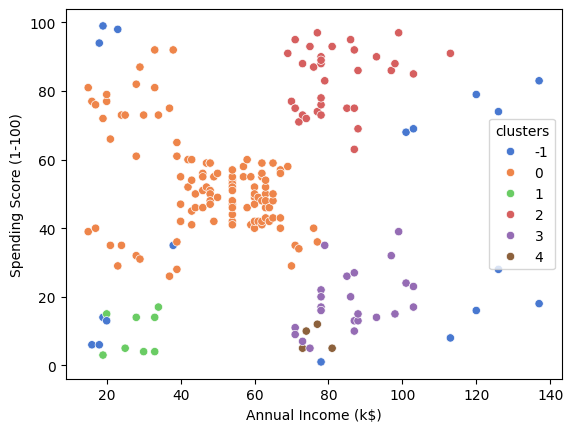

In [29]:
sns.scatterplot(data=dummies_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="clusters", palette="muted");